In [106]:
import pandas as pd
import sqlite3 
conn = sqlite3.connect('/Users/sandylee/git/flatiron_school_mod_2_project/database.sqlite')
cur = conn.cursor()

In [107]:
import matplotlib.style as style 
style.available
style.use('seaborn-poster') #sets the size of the charts
style.use('ggplot')

In [108]:
import warnings
warnings.filterwarnings('ignore')

In [109]:
all_german_2011_season = cur.execute("""SELECT Matches.Match_ID, HomeTeam, AwayTeam, FTHG, FTAG, FTR
                       From Matches
                       JOIN Teams_in_Matches
                       ON Matches.Match_ID = Teams_in_Matches.Match_ID
                       WHERE Matches.Season = 2011 AND (Matches.Div = "D1" OR Matches.Div = "D2")
                       """)

In [110]:
all_german_2011_season_df = pd.DataFrame(cur.fetchall())
all_german_2011_season_df.columns = [i[0] for i in cur.description]

In [111]:
all_german_2011_season_df

,Match_ID,HomeTeam,AwayTeam,FTHG,FTAG,FTR
0,1092,Nurnberg,Bayern Munich,0,1,A
1,1092,Nurnberg,Bayern Munich,0,1,A
2,1093,Stuttgart,Bayern Munich,1,2,A
3,1093,Stuttgart,Bayern Munich,1,2,A
4,1094,Wolfsburg,Bayern Munich,0,1,A
...,...,...,...,...,...,...
1219,1701,Ein Frankfurt,Fortuna Dusseldorf,1,1,D
1220,1702,Aachen,Fortuna Dusseldorf,0,0,D
1221,1702,Aachen,Fortuna Dusseldorf,0,0,D
1222,1703,Erzgebirge Aue,Fortuna Dusseldorf,2,4,A


In [50]:
all_german_2011_season_df.to_csv(r'/Users/sandylee/Desktop/csv.csv')

In [51]:
away_team_goals = cur.execute("""SELECT AwayTeam AS Team, SUM(FTAG) AS TotalAwayGoals
                             From Matches
                             JOIN Teams_in_Matches
                             ON Matches.Match_ID = Teams_in_Matches.Match_ID
                             WHERE Matches.Season = 2011 AND (Matches.Div = "D1" OR Matches.Div = "D2") AND FTR = "A"
                             GROUP BY Team
                             ORDER BY Team""")

In [52]:
away_team_goals_df = pd.DataFrame(cur.fetchall())
away_team_goals_df.columns = [i[0] for i in cur.description]

In [53]:
away_team_goals_df

,Team,TotalAwayGoals
0,Aachen,8
1,Augsburg,6
2,Bayern Munich,46
3,Bochum,20
4,Braunschweig,18
5,Cottbus,12
6,Dortmund,66
7,Dresden,18
8,Duisburg,8
9,Ein Frankfurt,60


In [54]:
home_team_goals = cur.execute("""SELECT HomeTeam AS Team, SUM(FTHG) AS TotalHomeGoals
                             From Matches
                             JOIN Teams_in_Matches
                             ON Matches.Match_ID = Teams_in_Matches.Match_ID
                             WHERE Matches.Season = 2011 AND (Matches.Div = "D1" OR Matches.Div = "D2") AND FTR = "H"
                             GROUP BY Team
                             ORDER BY Team""")

In [55]:
home_team_goals_df = pd.DataFrame(cur.fetchall())
home_team_goals_df.columns = [i[0] for i in cur.description]

In [56]:
home_team_goals_df

,Team,TotalHomeGoals
0,Aachen,16
1,Augsburg,22
2,Bayern Munich,98
3,Bochum,36
4,Braunschweig,34
5,Cottbus,16
6,Dortmund,76
7,Dresden,42
8,Duisburg,40
9,Ein Frankfurt,70


In [57]:
away_team_draw_goals = cur.execute("""SELECT AwayTeam AS Team, SUM(FTAG) AS TotalAwayTeamDrawGoals
                             From Matches
                             JOIN Teams_in_Matches
                             ON Matches.Match_ID = Teams_in_Matches.Match_ID
                             WHERE Matches.Season = 2011 AND (Matches.Div = "D1" OR Matches.Div = "D2") AND FTR = "D"
                             GROUP BY Team
                             ORDER BY Team""")

In [58]:
away_team_draw_goals_df = pd.DataFrame(cur.fetchall())
away_team_draw_goals_df.columns = [i[0] for i in cur.description]

In [59]:
away_team_draw_goals_df

,Team,TotalAwayTeamDrawGoals
0,Aachen,12
1,Augsburg,18
2,Bayern Munich,2
3,Bochum,2
4,Braunschweig,12
5,Cottbus,2
6,Dortmund,4
7,Dresden,12
8,Duisburg,14
9,Ein Frankfurt,10


In [60]:
home_team_draw_goals = cur.execute("""SELECT HomeTeam AS Team, SUM(FTHG) AS TotalHomeTeamDrawGoals
                             From Matches
                             JOIN Teams_in_Matches
                             ON Matches.Match_ID = Teams_in_Matches.Match_ID
                             WHERE Matches.Season = 2011 AND (Matches.Div = "D1" OR Matches.Div = "D2") AND FTR = "D"
                             GROUP BY Team
                             ORDER BY Team""")

In [61]:
home_team_draw_goals_df = pd.DataFrame(cur.fetchall())
home_team_draw_goals_df.columns = [i[0] for i in cur.description]

In [62]:
home_team_draw_goals_df

,Team,TotalHomeTeamDrawGoals
0,Aachen,10
1,Augsburg,12
2,Bayern Munich,0
3,Bochum,6
4,Braunschweig,6
5,Cottbus,18
6,Dortmund,10
7,Dresden,12
8,Duisburg,2
9,Ein Frankfurt,6


In [63]:
total_goals_df = away_team_goals_df.merge(home_team_goals_df, on="Team").merge(away_team_draw_goals_df, on="Team").merge(home_team_draw_goals_df, on="Team")

In [64]:
total_goals_df.insert(5,"TotalGoals", total_goals_df["TotalAwayGoals"]+total_goals_df["TotalHomeGoals"]+total_goals_df["TotalAwayTeamDrawGoals"]+total_goals_df["TotalHomeTeamDrawGoals"])

In [65]:
total_goals_df.sort_values(by="TotalGoals", ascending=False)

,Team,TotalAwayGoals,TotalHomeGoals,TotalAwayTeamDrawGoals,TotalHomeTeamDrawGoals,TotalGoals
6,Dortmund,66,76,4,10,156
9,Ein Frankfurt,60,70,10,6,146
2,Bayern Munich,46,98,2,0,146
30,Schalke 04,40,88,8,2,138
15,Greuther Furth,34,84,16,2,136
12,Fortuna Dusseldorf,38,58,14,8,118
32,Stuttgart,26,62,20,6,114
31,St Pauli,28,62,12,4,106
27,Munich 1860,32,56,12,4,104
29,Paderborn,38,42,6,12,98


In [84]:
win_loss_count_dataframe_shape = {'Team': teams, 
                                  'Wins': [0]*36, 
                                  'Loses': [0]*36}

In [85]:
teams = ['Aachen', 
         'Augsburg',
         'Bayern Munich', 
         'Bochum', 
         'Braunschweig', 
         'Cottbus',
         'Dortmund',
         'Dresden',
         'Duisburg',
         'Ein Frankfurt',
         'Erzgebirge Aue',
         'FC Koln',
         'Fortuna Dusseldorf',
         'Frankfurt FSV',
         'Freiburg',
         'Greuther Furth',
         'Hamburg',
         'Hannover',
         'Hansa Rostock',
         'Hertha',
         'Hoffenheim',
         'Ingolstadt',
         'Kaiserslautern',
         'Karlsruhe',
         'Leverkusen',
         'M\'gladbach',
         'Mainz',
         'Munich 1860',
         'Nurnberg',
         'Paderborn',
         'Schalke 04',
         'St Pauli',
         'Stuttgart',
         'Union Berlin',
         'Werder Bremen',
         'Wolfsburg']

In [112]:
win_loss_count_df = pd.DataFrame(data=win_loss_count_dataframe_shape)

In [113]:
win_loss_count_df.set_index(keys="Team", inplace=True)

In [117]:
win_loss_count_df

,Wins,Loses
Team,,
Aachen,12,56
Augsburg,16,52
Bayern Munich,46,22
Bochum,20,48
Braunschweig,20,48
Cottbus,16,52
Dortmund,50,18
Dresden,24,44
Duisburg,20,48


In [115]:
for i, row in all_german_2011_season_df.iterrows():
    if row['FTR'] == 'A':
        win_loss_count_df.loc[row["AwayTeam"]]["Wins"] +=1
    if row['FTR'] == 'H':
        win_loss_count_df.loc[row["HomeTeam"]]["Wins"] +=1

In [116]:
win_loss_count_df["Loses"] = 68 - win_loss_count_df["Wins"]

In [103]:
win_loss_count_df.sort_index(by="Wins", inplace=True)

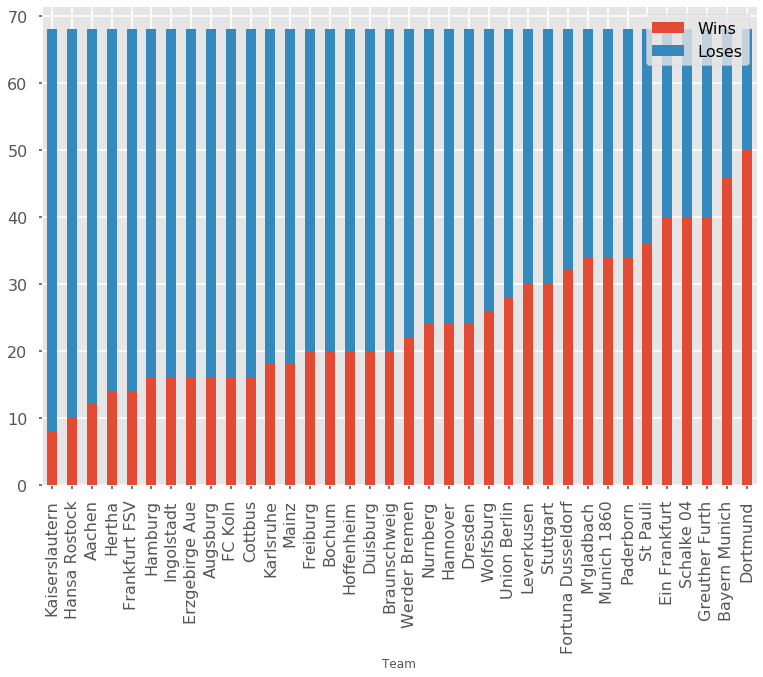

In [104]:
win_loss_count_df.plot.bar(stacked = "True");